# Luis Maximiliano López Ramírez A00833321

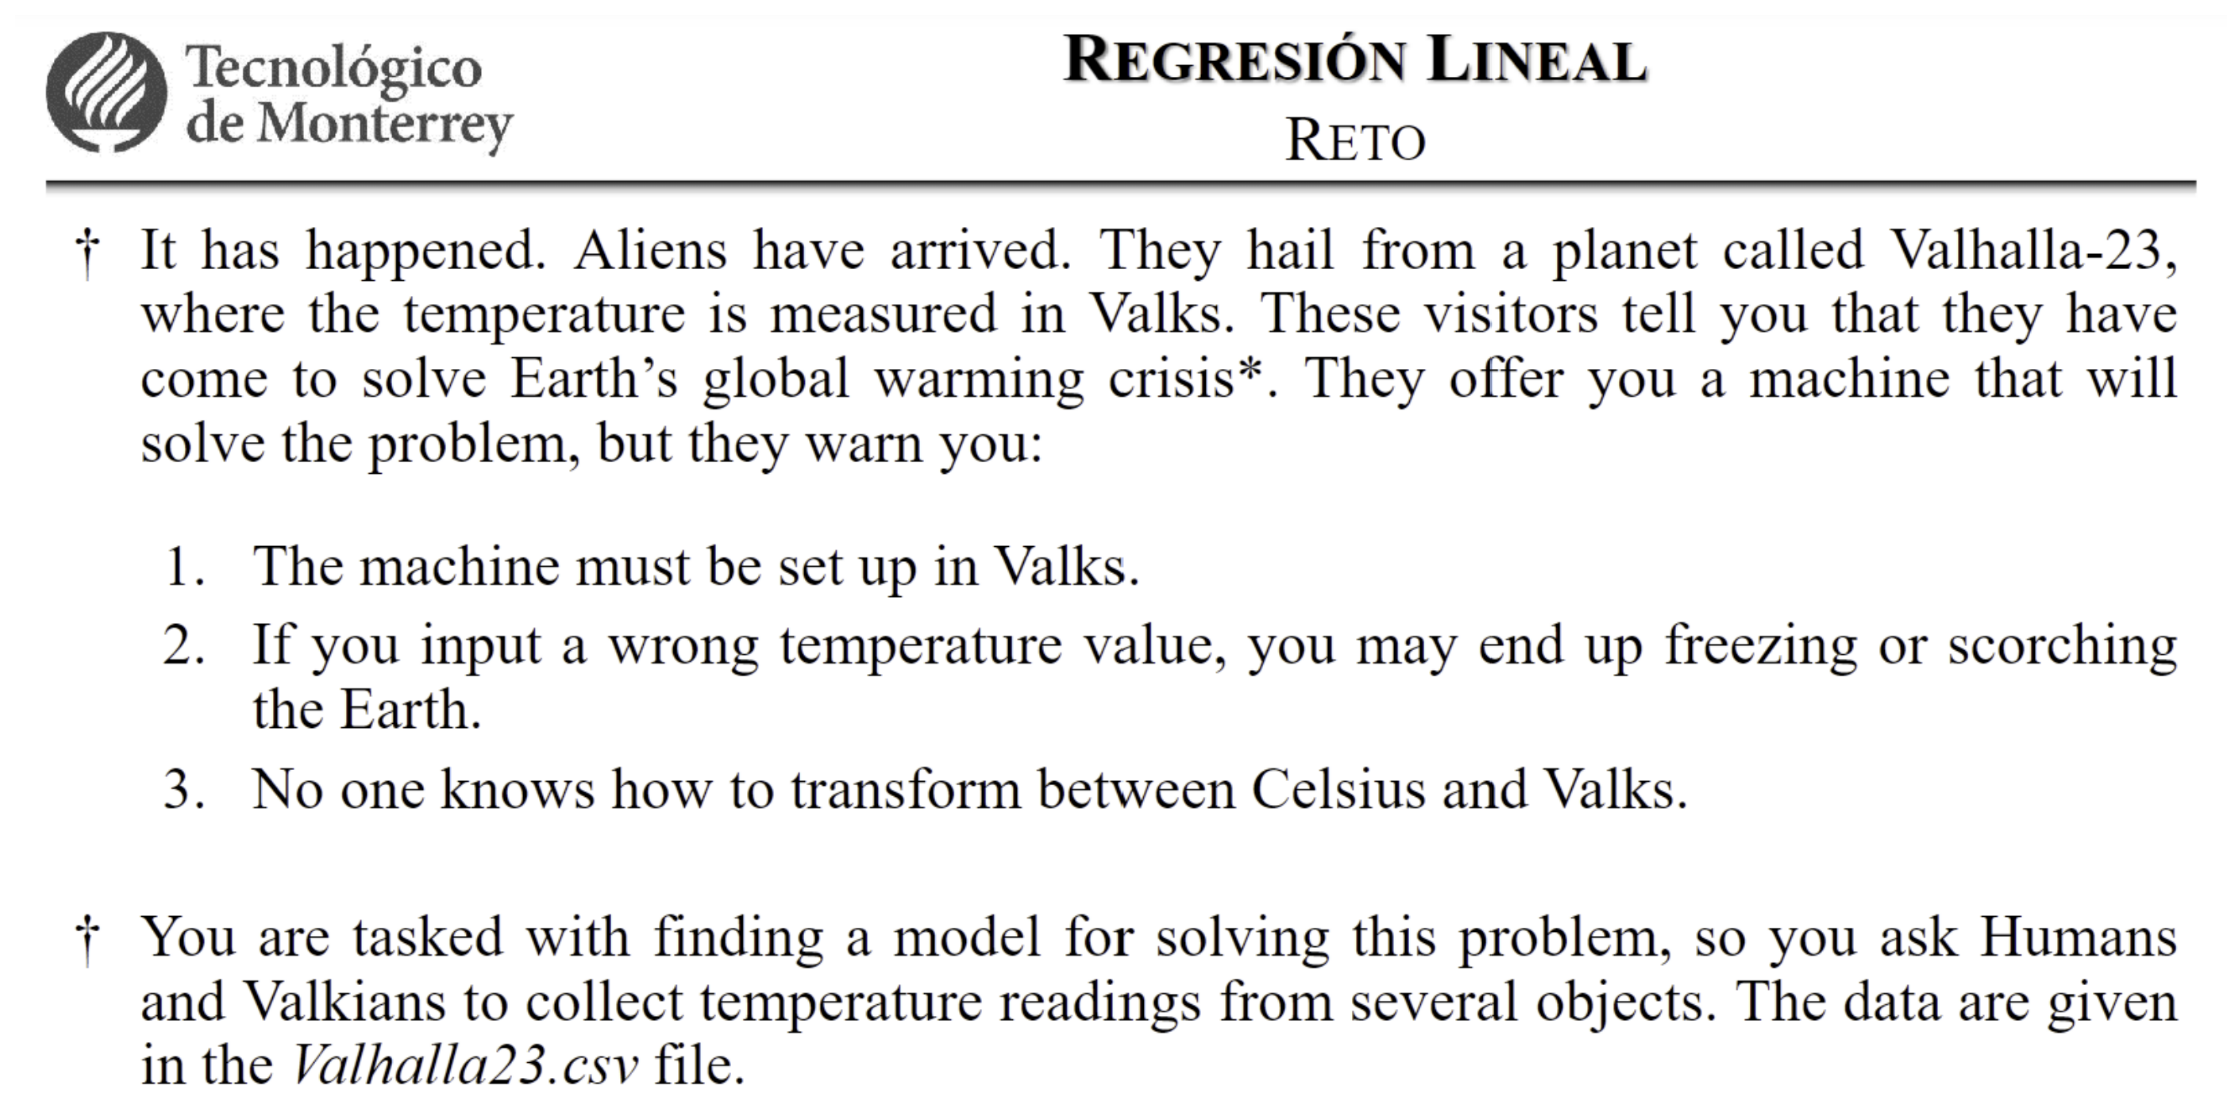

## Importar librerías

In [17]:
import random
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import resample

## 1. Crea un espacio dentro del repositorio de GitHub que creaste para el portafolio de análisis (por ejemplo, una carpeta para el módulo de ML con una subcarpeta para este entregable).

## Link del repositorio (Mi branch): https://github.com/AdrianPinedaSanchez/RetoIAAvanzada/tree/Luis

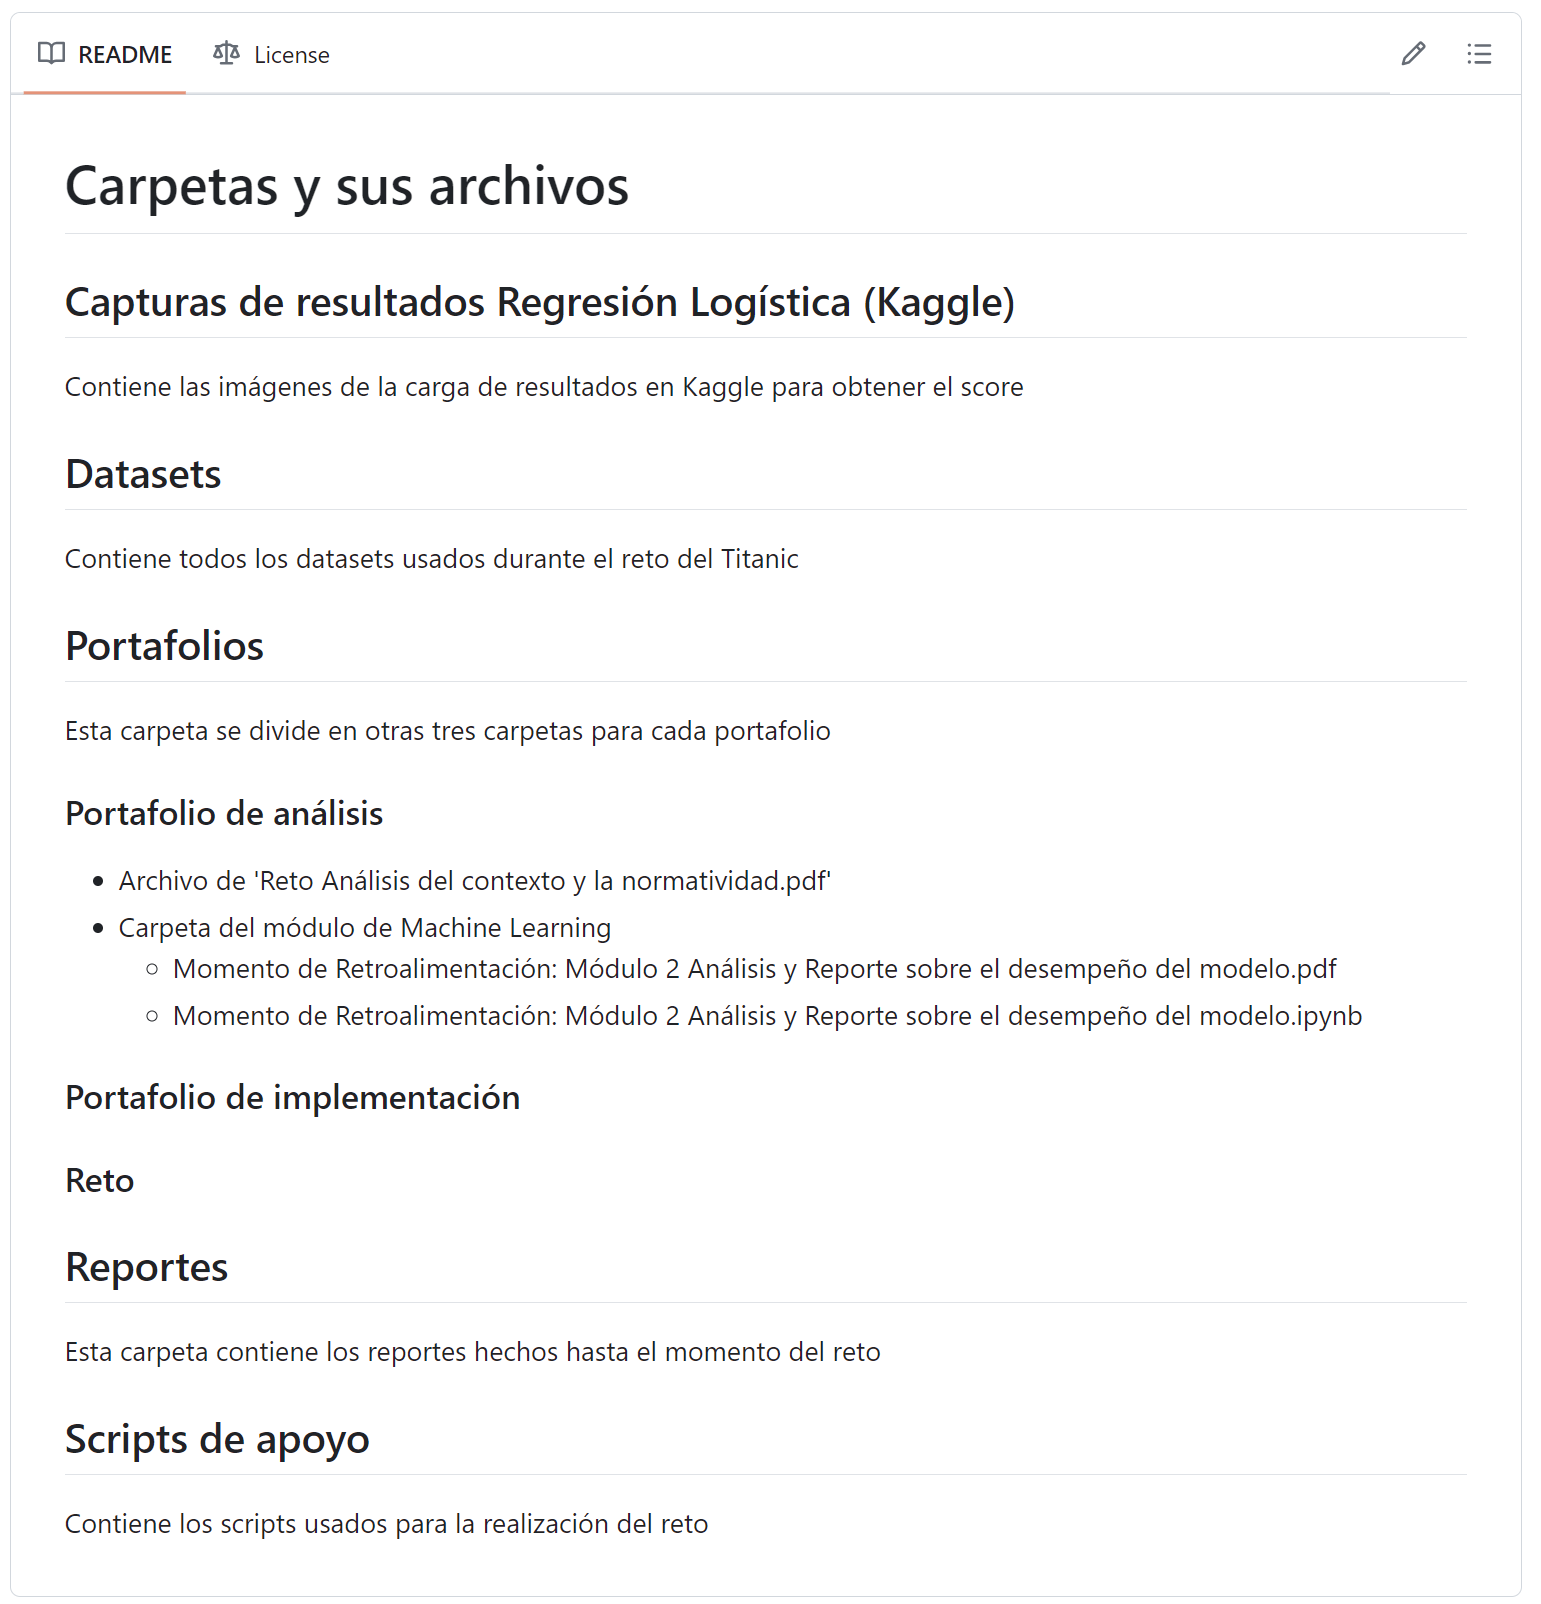

## 2. Define una semilla que corresponda con los últimos cuatro dígitos de tu matrícula

In [7]:
# Define la semilla con los últimos cuatro dígitos de la matrícula A00833321
seed = 3321

## 3. Carga el set de datos de Valhalla y divide el set de datos en entrenamiento (40%), validación (40%), y prueba (20%), utilizando el método train_test_split. y la semilla definida arriba

In [8]:
# Leer el archivo CSV
df = pd.read_csv('valhalla23.csv')

# Primera división: separa el conjunto de prueba (20%)
train_val, test = train_test_split(df, test_size=0.2, random_state=seed)

# Segunda división: separa en entrenamiento (40%) y validación (40%)
train, validation = train_test_split(train_val, test_size=0.5, random_state=seed)

# Imprimir tamaños de cada conjunto
print(f'Tamaño del conjunto de entrenamiento: {len(train)}')
print(f'Tamaño del conjunto de validación: {len(validation)}')
print(f'Tamaño del conjunto de prueba: {len(test)}')

Tamaño del conjunto de entrenamiento: 40
Tamaño del conjunto de validación: 40
Tamaño del conjunto de prueba: 20


In [10]:
train.head()

,Celsius,Valks
20,45.5740,-81.557
92,33.0800,-56.911
38,75.0220,-171.650
43,59.5200,-111.750
69,5.7508,31.984


## 4. Entrena un modelo base de tipo SGDRegressor que utilice una tasa de aprendizaje de 1E-4, un máximo de iteraciones de un millón, y que utilice la semilla definida arriba

In [12]:
X_train = train.drop(columns=['Valks'])
y_train = train['Valks']

X_validation = validation.drop(columns=['Valks'])
y_validation = validation['Valks']

X_test = test.drop(columns=['Valks'])
y_test = test['Valks']


# Define el modelo SGDRegressor con los parámetros especificados
sgd_regressor = SGDRegressor(
    learning_rate='constant',
    eta0=1E-4,
    max_iter=1_000_000,
    random_state=seed
)

# Entrena el modelo con los datos de entrenamiento
sgd_regressor.fit(X_train, y_train)

SGDRegressor(eta0=0.0001, learning_rate='constant', max_iter=1000000,
             random_state=3321)

## 5. Calcula el error cuadrático medio para este modelo, sobre los datos de entrenamiento, validación, y prueba. Estos datos servirán como línea base.

In [13]:
# Realiza predicciones sobre los conjuntos de entrenamiento, validación y prueba
y_train_pred = sgd_regressor.predict(X_train)
y_validation_pred = sgd_regressor.predict(X_validation)
y_test_pred = sgd_regressor.predict(X_test)

# Calcula el MSE para cada conjunto
mse_train = mean_squared_error(y_train, y_train_pred)
mse_validation = mean_squared_error(y_validation, y_validation_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

# Imprime los resultados
print(f'Error Cuadrático Medio en Entrenamiento: {mse_train}')
print(f'Error Cuadrático Medio en Validación: {mse_validation}')
print(f'Error Cuadrático Medio en Prueba: {mse_test}')

Error Cuadrático Medio en Entrenamiento: 963.0827771507342
Error Cuadrático Medio en Validación: 1220.8900903634697
Error Cuadrático Medio en Prueba: 1345.0681772611265


## 6. Realiza una gráfica donde muestres cada subconjunto de datos (entrenamiento, validación, prueba) y el modelo de regresión obtenido (como una recta)

C:\Users\luism\.conda\envs\rstudio\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SGDRegressor was fitted with feature names
  "X does not have valid feature names, but"


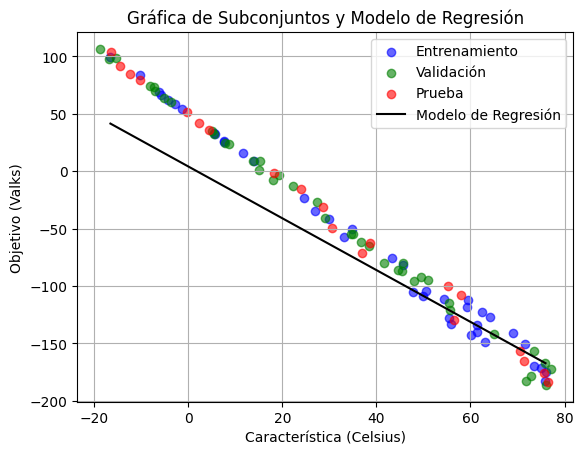

In [30]:
# Asumiendo que el conjunto de datos tiene una sola característica para una visualización 2D
feature = 'Celsius'  # Reemplaza con el nombre correcto de la característica

# Gráficos de dispersión para los conjuntos de entrenamiento, validación y prueba
plt.scatter(X_train[feature], y_train, color='blue', label='Entrenamiento', alpha=0.6)
plt.scatter(X_validation[feature], y_validation, color='green', label='Validación', alpha=0.6)
plt.scatter(X_test[feature], y_test, color='red', label='Prueba', alpha=0.6)

# Generar valores para la recta de regresión
X_plot = np.linspace(X_train[feature].min(), X_train[feature].max(), 100).reshape(-1, 1)
y_plot = sgd_regressor.predict(X_plot)

# Graficar la recta de regresión
plt.plot(X_plot, y_plot, color='black', label='Modelo de Regresión')

# Etiquetas y título
plt.xlabel('Característica (Celsius)')
plt.ylabel('Objetivo (Valks)')
plt.title('Gráfica de Subconjuntos y Modelo de Regresión')
plt.legend()
plt.grid(True)
plt.show()

## 7. Crea una lista que contenga 20 elementos (enteros) entre 2 y 39 (sin repetición, y que incluyan el número 2). Estos valores representarán la cantidad de instancias que se usarán para el análisis

In [18]:
# Lista de tamaños de muestras
tamaños_muestras = [2, 5, 7, 8, 10, 12, 14, 15, 17, 18, 20, 22, 25, 27, 28, 30, 32, 35, 37, 39]

## 8. Para cada uno de los tamaños del punto anterior, entrena 100 modelos usando un subconjunto aleatorio del set de entrenamiento que contenga esa cantidad de muestras. Por ejemplo, para el tamaño de 2 muestras, se deben entrenar 100 modelos utilizando 2 muestras seleccionadas aleatoriamente de las 40 muestras disponibles en el set de entrenamiento

In [27]:
# Resultados de MSE para cada tamaño de muestra
resultados_mse = {}

# Definir la semilla
seed = 3321

# Iterar sobre cada tamaño de muestra
for tamaño in tamaños_muestras:
    mse_entrenamiento = []  # Lista para MSE en los conjuntos de entrenamiento
    mse_validacion = []     # Lista para MSE en el conjunto de validación

    # Entrenar 100 modelos para cada tamaño de muestra
    for _ in range(100):
        # Seleccionar aleatoriamente 'tamaño' muestras del conjunto de entrenamiento
        X_sample, y_sample = resample(X_train, y_train, n_samples=tamaño, random_state=seed)
        
        # Definir el modelo SGDRegressor
        sgd_regressor = SGDRegressor(
            learning_rate='constant',
            eta0=1E-4,
            max_iter=1_000_000,
            random_state=seed
        )

        # Entrenar el modelo con las muestras seleccionadas
        sgd_regressor.fit(X_sample, y_sample)

        # Calcular el MSE en el subconjunto de entrenamiento
        y_train_pred = sgd_regressor.predict(X_sample)
        mse_train = mean_squared_error(y_sample, y_train_pred)
        mse_entrenamiento.append(mse_train)

        # Calcular el MSE en el subconjunto de validación
        y_val_pred = sgd_regressor.predict(X_validation)
        mse_val = mean_squared_error(y_validation, y_val_pred)
        mse_validacion.append(mse_val)
    
    # Guardar los MSE promedios para el tamaño de muestra actual
    resultados_mse[tamaño] = {
        'MSE_Entrenamiento': mse_entrenamiento,
        'MSE_Validacion': mse_validacion
    }

## 9. Para cada uno de los modelos del punto anterior, calcula el error cuadrático medio en el subconjunto de entrenamiento (el que tiene un número cambiante de muestras), y en el subconjunto de validación

In [21]:
# Mostrar resultados
for tamaño, mses in resultados_mse.items():
    mse_train_avg = sum(mses['MSE_Entrenamiento']) / len(mses['MSE_Entrenamiento'])
    mse_val_avg = sum(mses['MSE_Validacion']) / len(mses['MSE_Validacion'])
    print(f'Tamaño de Muestra: {tamaño}, Promedio MSE Entrenamiento: {mse_train_avg:.4f}, Promedio MSE Validación: {mse_val_avg:.4f}')

Tamaño de Muestra: 2, Promedio MSE Entrenamiento: 1.0811, Promedio MSE Validación: 1223.7176
Tamaño de Muestra: 5, Promedio MSE Entrenamiento: 883.4874, Promedio MSE Validación: 1217.6052
Tamaño de Muestra: 7, Promedio MSE Entrenamiento: 34.2793, Promedio MSE Validación: 30.2496
Tamaño de Muestra: 8, Promedio MSE Entrenamiento: 1022.8930, Promedio MSE Validación: 1225.7374
Tamaño de Muestra: 10, Promedio MSE Entrenamiento: 972.4947, Promedio MSE Validación: 1223.2925
Tamaño de Muestra: 12, Promedio MSE Entrenamiento: 972.7995, Promedio MSE Validación: 1114.5638
Tamaño de Muestra: 14, Promedio MSE Entrenamiento: 937.0436, Promedio MSE Validación: 1255.9183
Tamaño de Muestra: 15, Promedio MSE Entrenamiento: 887.6382, Promedio MSE Validación: 1199.7371
Tamaño de Muestra: 17, Promedio MSE Entrenamiento: 915.6619, Promedio MSE Validación: 1262.1383
Tamaño de Muestra: 18, Promedio MSE Entrenamiento: 1030.2475, Promedio MSE Validación: 1208.9914
Tamaño de Muestra: 20, Promedio MSE Entrenamien

## 10. Calcula el promedio de las 100 repeticiones para cada uno de los modelos y sus errores. Esto debería generar dos listas de 20 valores cada uno, donde cada elemento representa el error promedio de las 100 repeticiones que se hicieron para cada subconjunto de entrenamiento

In [23]:
# Listas para almacenar los promedios de MSE en entrenamiento y validación
promedios_mse_entrenamiento = []
promedios_mse_validacion = []

# Iterar sobre los resultados almacenados para cada tamaño de muestra
for tamaño, mses in resultados_mse.items():
    # Calcular el promedio de MSE en entrenamiento
    mse_train_avg = sum(mses['MSE_Entrenamiento']) / len(mses['MSE_Entrenamiento'])
    promedios_mse_entrenamiento.append(mse_train_avg)
    
    # Calcular el promedio de MSE en validación
    mse_val_avg = sum(mses['MSE_Validacion']) / len(mses['MSE_Validacion'])
    promedios_mse_validacion.append(mse_val_avg)

# Imprimir los promedios para ver los resultados
print(f'Promedios de MSE en Entrenamiento: {promedios_mse_entrenamiento}')
print('')
print(f'Promedios de MSE en Validación: {promedios_mse_validacion}')


Promedios de MSE en Entrenamiento: [1.0811187999544105, 883.4874246334217, 34.27925965355367, 1022.8930360326341, 972.4946683760983, 972.799451789707, 937.0435891312812, 887.6381628745926, 915.6618522244577, 1030.2475249381057, 994.3814648787364, 937.8495043114925, 910.2404400799766, 878.3034495277441, 974.7423229942168, 899.0332677599949, 909.6518644498034, 1025.0729946894999, 1041.287972710197, 1143.9096212990696]

Promedios de MSE en Validación: [1223.7175971292606, 1217.6051755713559, 30.249572367132746, 1225.7374417668323, 1223.2924636505813, 1114.5638327162023, 1255.918250314834, 1199.7370983844166, 1262.1382517683817, 1208.99142099811, 1257.7161153115749, 1273.2879813531463, 1205.544724983891, 1156.4618032854162, 1182.4026634508928, 1216.941823255129, 1198.0455144514967, 1139.9530972948842, 1150.157110460382, 1152.5912819598993]


## 11. Agrega a las listas anteriores los errores de entrenamiento y validación de la línea base

In [25]:
# Definir el modelo base SGDRegressor con la configuración inicial
sgd_regressor_base = SGDRegressor(
    learning_rate='constant',
    eta0=1E-4,
    max_iter=1_000_000,
    random_state=seed
)

# Entrenar el modelo base con todo el conjunto de entrenamiento
sgd_regressor_base.fit(X_train, y_train)

# Calcular el MSE en el conjunto de entrenamiento completo
y_train_pred_base = sgd_regressor_base.predict(X_train)
mse_train_base = mean_squared_error(y_train, y_train_pred_base)

# Calcular el MSE en el conjunto de validación
y_validation_pred_base = sgd_regressor_base.predict(X_validation)
mse_validation_base = mean_squared_error(y_validation, y_validation_pred_base)

# Agregar los errores de la línea base a las listas
promedios_mse_entrenamiento.append(mse_train_base)
promedios_mse_validacion.append(mse_validation_base)

# Mostrar los errores de la línea base
print(f'MSE Línea Base Entrenamiento: {mse_train_base:.4f}')
print(f'MSE Línea Base Validación: {mse_validation_base:.4f}')


MSE Línea Base Entrenamiento: 963.0828
MSE Línea Base Validación: 1220.8901


## 12. Haz una gráfica donde se muestre la evolución del error promedio de entrenamiento y validación, para cada uno de los diferentes tamaños de entrenamiento

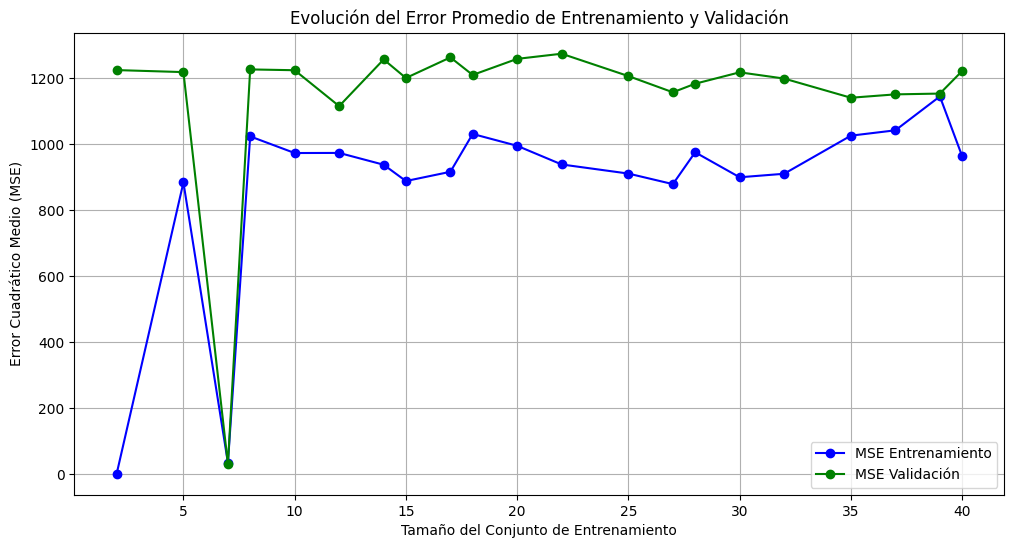

In [26]:
# Lista de tamaños de muestra, incluyendo el tamaño completo (línea base)
tamaños_muestras = [2, 5, 7, 8, 10, 12, 14, 15, 17, 18, 20, 22, 25, 27, 28, 30, 32, 35, 37, 39, len(X_train)]

# Graficar la evolución del error promedio de entrenamiento y validación
plt.figure(figsize=(12, 6))
plt.plot(tamaños_muestras, promedios_mse_entrenamiento, marker='o', linestyle='-', color='blue', label='MSE Entrenamiento')
plt.plot(tamaños_muestras, promedios_mse_validacion, marker='o', linestyle='-', color='green', label='MSE Validación')

# Etiquetas y título
plt.xlabel('Tamaño del Conjunto de Entrenamiento')
plt.ylabel('Error Cuadrático Medio (MSE)')
plt.title('Evolución del Error Promedio de Entrenamiento y Validación')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()


## 13. Con base en la grafica anterior, explica el tipo de ajuste obtenido para el primer modelo (el entrenado sobre 2 muestras) y para el modelo final (el entrenado sobre 40 muestras). También explica como cambia el tipo de ajuste a medida que se incrementa el número de muestras del entrenamiento. Incluye también en tu análisis el grado de sesgo y de varianza para los diferentes modelos.

En la gráfica presentada, se observa cómo evoluciona el error cuadrático medio (MSE) en los conjuntos de entrenamiento y validación a medida que se incrementa el número de muestras en el conjunto de entrenamiento. Vamos a analizar el tipo de ajuste para los modelos entrenados sobre 2 y 40 muestras, así como el cambio en el ajuste a medida que se incrementa el número de muestras:

### Modelo Entrenado sobre 2 Muestras:
* **Ajuste:** El modelo entrenado con solo 2 muestras muestra un error de entrenamiento muy bajo (prácticamente nulo), lo cual indica un sobreajuste severo (overfitting). Esto ocurre porque con tan pocas muestras, el modelo puede memorizar los datos de entrenamiento, ajustándose perfectamente a ellos, pero fallando en generalizar.

* **Sesgo y Varianza:** Este modelo presenta un bajo sesgo pero una alta varianza, ya que es extremadamente sensible a los datos de entrenamiento y no generaliza bien a nuevos datos, lo que se refleja en un alto MSE en validación.

### Modelo Entrenado sobre 40 Muestras:
* **Ajuste:** El modelo entrenado con 40 muestras (el conjunto completo) tiene un error más balanceado en entrenamiento y validación, aunque ambos errores son algo elevados. Esto sugiere que el modelo está en una fase más controlada de ajuste, sin sobreajuste extremo ni subajuste (underfitting).

* **Sesgo** y Varianza: Este modelo muestra un moderado sesgo y una varianza también moderada, lo cual es típico en modelos que intentan equilibrar el ajuste de los datos de entrenamiento y la capacidad de generalización.

### Evolución del Ajuste con el Incremento de Muestras:

A medida que se incrementa el número de muestras de entrenamiento, se observa una tendencia en la cual el MSE de validación disminuye y se estabiliza, mientras que el MSE de entrenamiento aumenta ligeramente. Esto indica una reducción progresiva del sobreajuste y una mejora en la capacidad de generalización del modelo.

Sesgo y Varianza: Con pocos datos, el modelo tiene baja varianza pero alto sesgo, lo cual es típico de un modelo con sobreajuste. A medida que se agregan más datos, la varianza se reduce y el sesgo se incrementa ligeramente hasta que ambos errores se estabilizan, indicando que el modelo logra un mejor balance.

## 14. Con base en la gráfica y los datos, identifica la cantidad de muestras más adecuada para realizar el entrenamiento. Justifica tu selección. 

La muestra con 7 instancias es la más adecuada para el entrenamiento porque presenta un MSE promedio muy bajo (alrededor de 30) tanto en el conjunto de entrenamiento como en el de validación. Esto indica un excelente balance entre sesgo y varianza, sin sobreajuste ni subajuste. Aumentar el tamaño de la muestra más allá de 7 incluso empeora significativamente los errores, por lo que 7 es la opción más eficiente y efectiva para el entrenamiento del modelo en este caso.

## 15. Entrena un nuevo modelo utilizando esa cantidad de muestras, y calcula su error cuadrático medio sobre el subconjunto de entrenamiento (el de la cantidad de muestras seleccionadas), el de validación, y el de prueba. 

In [28]:
# Seleccionar aleatoriamente 7 muestras del conjunto de entrenamiento
X_sample, y_sample = resample(X_train, y_train, n_samples=7, random_state=seed)

# Definir y entrenar el modelo SGDRegressor con las 7 muestras
sgd_regressor_7 = SGDRegressor(
    learning_rate='constant',
    eta0=1E-4,
    max_iter=1_000_000,
    random_state=seed
)

sgd_regressor_7.fit(X_sample, y_sample)

# Calcular el MSE en el conjunto de entrenamiento con 7 muestras
y_train_pred_sample = sgd_regressor_7.predict(X_sample)
mse_train_sample = mean_squared_error(y_sample, y_train_pred_sample)

# Calcular el MSE en el conjunto de validación
y_validation_pred = sgd_regressor_7.predict(X_validation)
mse_validation = mean_squared_error(y_validation, y_validation_pred)

# Calcular el MSE en el conjunto de prueba
y_test_pred = sgd_regressor_7.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)

# Imprimir los errores cuadráticos medios
print(f'MSE Entrenamiento (7 muestras): {mse_train_sample:.4f}')
print(f'MSE Validación: {mse_validation:.4f}')
print(f'MSE Prueba: {mse_test:.4f}')


MSE Entrenamiento (7 muestras): 34.2793
MSE Validación: 30.2496
MSE Prueba: 45.3262


## 16. Compara los valores del punto anterior contra los errores obtenidos para la línea base (ver punto 5)

Comparando los errores del modelo entrenado con 7 muestras contra los de la línea base, podemos observar lo siguiente:

### Errores del Modelo con 7 Muestras:

* **MSE Entrenamiento (7 muestras):** 34.2793
* **MSE Validación:** 30.2496
* **MSE Prueba:** 45.3262

### Errores de la Línea Base (Modelo entrenado con 40 muestras):
* **MSE Entrenamiento:** 963.0828
* **MSE Validación:** 1220.8901
* **MSE Prueba:** 1345.0682

El modelo entrenado con 7 muestras ofrece un rendimiento significativamente mejor en los conjuntos de entrenamiento, validación y prueba comparado con la línea base. Esto indica que, a pesar de usar un menor número de muestras, este modelo es capaz de capturar mejor las relaciones en los datos y generalizar de manera efectiva. El modelo de la línea base, aunque utiliza más datos, parece sufrir de sobreajuste y muestra una peor capacidad de generalización.

Por lo tanto, el modelo con 7 muestras es claramente superior en términos de error y generalización, haciendo un uso más eficiente de los datos disponibles.

## 17. Argumenta cuál configuración funcionó mejor, y por qué

El modelo entrenado con 7 muestras funcionó mejor porque mostró errores cuadráticos medios significativamente más bajos en los conjuntos de entrenamiento, validación y prueba, en comparación con la línea base que utilizó las 40 muestras. Esto indica que el modelo de 7 muestras tiene un mejor balance entre sesgo y varianza, lo que le permite generalizar adecuadamente sin sobreajustarse a los datos. Además, es más eficiente al usar menos datos, evitando el ruido y la complejidad innecesaria que afecta al modelo de la línea base. En resumen, el modelo con 7 muestras capta la estructura esencial del problema y generaliza mejor.